# Plotting

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
from astropy.io import fits

Download image files (**this may take a few minutes to execute**) 

http://www.astropy.org/astropy-tutorials/edshift_plot.html

http://reproject.readthedocs.org/en/stable/api/reproject.reproject_interp.html#reproject.reproject_interp

http://www.ster.kuleuven.be/~pieterd/python/html/plotting/aplpy.html

https://aplpy.readthedocs.org/en/v0.9.9/_generated/aplpy.rgb.make_rgb_cube.html
https://aplpy.readthedocs.org/en/v0.9.9/_generated/aplpy.rgb.make_rgb_image.html

In [4]:
import urllib
import zipfile

images = ['502nmos','656nmos','673nmos']

for i in images:
    testfile = urllib.URLopener()
    testfile.retrieve("https://www.spacetelescope.org/static/projects/fits_liberator/datasets/eagle/"+i+".zip", "../data/"+i+".zip")

    fh = open('../data/'+i+'.zip', 'r')
    z = zipfile.ZipFile(fh)
    z.extractall('../data/')

KeyboardInterrupt: 

### Aplpy
Using AplPy to combine into an RGB image.

In [5]:
import aplpy
aplpy.make_rgb_cube(['../data/673nmos.fits','../data/656nmos.fits','../data/502nmos.fits'], '../data/nmod_cube.fits')

INFO:astropy:Deleting work directory /tmp/tmpqXGZFC


INFO: Deleting work directory /tmp/tmpqXGZFC [montage_wrapper.wrappers]
INFO

INFO:astropy:Deleting work directory /tmp/tmpVeccef


: Deleting work directory /tmp/tmpVeccef [montage_wrapper.wrappers]
INFO

INFO:astropy:Deleting work directory /tmp/tmp2KXOkk


: Deleting work directory /tmp/tmp2KXOkk [montage_wrapper.wrappers]


In [6]:
aplpy.make_rgb_image('../data/nmod_cube.fits','../data/output/nmod.png')#, stretch_r='arcsinh', stretch_g='arcsinh', stretch_b='arcsinh')

INFO:astropy:Red:


INFO: Red: [aplpy.rgb]
INFO

INFO:astropy:vmin =  0.000e+00 (auto)
INFO:astropy:vmax =  7.043e+01 (auto)
INFO:astropy:Green:


: vmin =  0.000e+00 (auto) [aplpy.rgb]
INFO: vmax =  7.043e+01 (auto) [aplpy.rgb]
INFO: Green: [aplpy.rgb]
INFO

INFO:astropy:vmin =  0.000e+00 (auto)
INFO:astropy:vmax =  2.971e+02 (auto)
INFO:astropy:Blue:


: vmin =  0.000e+00 (auto) [aplpy.rgb]
INFO: vmax =  2.971e+02 (auto) [aplpy.rgb]
INFO: Blue: [aplpy.rgb]
INFO

INFO:astropy:vmin =  0.000e+00 (auto)
INFO:astropy:vmax =  2.175e+01 (auto)


: vmin =  0.000e+00 (auto) [aplpy.rgb]
INFO: vmax =  2.175e+01 (auto) [aplpy.rgb]


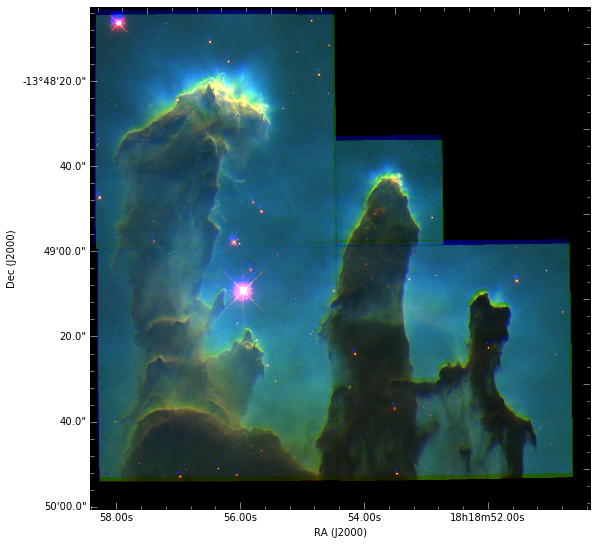

In [8]:
f = aplpy.FITSFigure('../data/nmod_cube_2d.fits')
f.show_rgb('../data/output/nmod.png')

#f.add_scalebar(5/60.)
#f.scalebar.set_corner('left')
#f.scalebar.set_length(17/600.)
#f.scalebar.set_label('0.1 parsec')

#f.tick_labels.set_xformat('hhmmss')
#f.tick_labels.set_yformat('hhmmss')


https://github.com/Caltech-IPAC/Montage https://aplpy.github.io/install.html

### Alternative Plotting method
pip install aplpy wcsaxes

In [28]:
from astropy.wcs import WCS
wcs = WCS('../data/502nmos.fits')
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 274.71130937177003  -13.816000630104  
CRPIX : 386.5  396.0  
CD1_1 CD1_2  : 1.8780129999999999e-05  -2.031193e-05  
CD2_1 CD2_2  : -2.029358e-05  -1.8797110000000001e-05  
NAXIS    : 1600 1600

In [42]:
eagle_OIII = fits.open('../data/502nmos.fits')
data = eagle_OIII[0].data

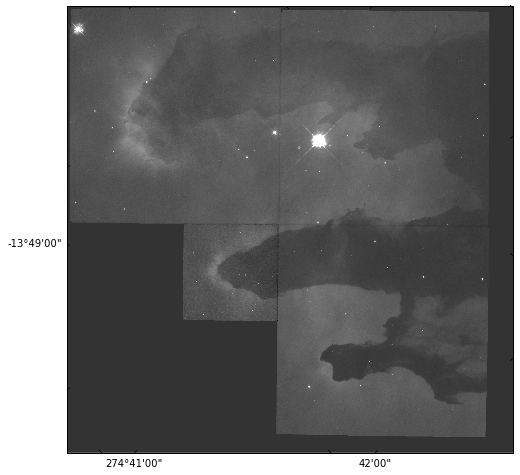

In [108]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1, projection=wcs)
ax.imshow(data, vmax=50, cmap='gray')

In [173]:
from reproject import reproject_interp

nmos502 = fits.open('../data/502nmos.fits')[0]
nmos656 = fits.open('../data/656nmos.fits')[0]
nmos673 = fits.open('../data/673nmos.fits')[0]

array656, footprint = reproject_interp(nmos656, nmos502.header)
array673, footprint = reproject_interp(nmos673, nmos502.header)

In [175]:
hdu = fits.PrimaryHDU(array656, nmos502.header)
hdulist = fits.HDUList([hdu])
hdulist.writeto('../data/656nmos_reproc.fits', clobber=True)

hdu = fits.PrimaryHDU(array673, nmos502.header)
hdulist = fits.HDUList([hdu])
hdulist.writeto('../data/673nmos_reproc.fits', clobber=True)

INFO:astropy:Deleting work directory /tmp/tmpMaDRL7


INFO: Deleting work directory /tmp/tmpMaDRL7 [montage_wrapper.wrappers]
INFO

INFO:astropy:Deleting work directory /tmp/tmpD2uqUm


: Deleting work directory /tmp/tmpD2uqUm [montage_wrapper.wrappers]
INFO

INFO:astropy:Deleting work directory /tmp/tmpAbzKX4


: Deleting work directory /tmp/tmpAbzKX4 [montage_wrapper.wrappers]
INFO

INFO:astropy:Red:


: Red: [aplpy.rgb]
INFO

INFO:astropy:vmin =  0.000e+00 (auto)
INFO:astropy:vmax =  7.076e+01 (auto)
INFO:astropy:Green:


: vmin =  0.000e+00 (auto) [aplpy.rgb]
INFO: vmax =  7.076e+01 (auto) [aplpy.rgb]
INFO: Green: [aplpy.rgb]
INFO

INFO:astropy:vmin =  0.000e+00 (auto)
INFO:astropy:vmax =  2.976e+02 (auto)
INFO:astropy:Blue:


: vmin =  0.000e+00 (auto) [aplpy.rgb]
INFO: vmax =  2.976e+02 (auto) [aplpy.rgb]
INFO: Blue: [aplpy.rgb]
INFO

INFO:astropy:vmin =  0.000e+00 (auto)
INFO:astropy:vmax =  2.178e+01 (auto)


: vmin =  0.000e+00 (auto) [aplpy.rgb]
INFO: vmax =  2.178e+01 (auto) [aplpy.rgb]


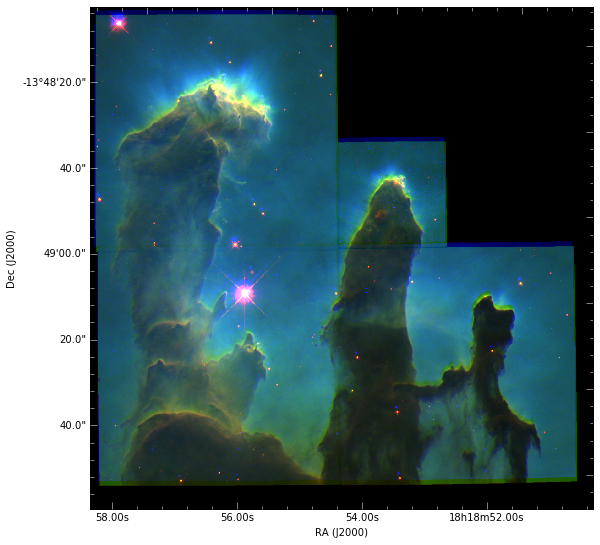

In [176]:
aplpy.make_rgb_cube(['../data/673nmos_reproc.fits','../data/656nmos_reproc.fits','../data/502nmos.fits'], '../data/nmod_cube.fits')
aplpy.make_rgb_image('../data/nmod_cube.fits','../data/output/nmod.png')
f = aplpy.FITSFigure('../data/nmod_cube_2d.fits')
f.show_rgb('../data/output/nmod.png')

In [133]:
from PIL import Image

rgbArray = np.dstack((array673, array656, nmos502.data))
rgbArray

#img = Image.fromarray(rgbArray)
#img.save('../data/output/myimg.jpeg')

array([[[ nan,  nan,   0.],
        [ nan,  nan,   0.],
        [ nan,  nan,   0.],
        ..., 
        [ nan,  nan,   0.],
        [ nan,  nan,   0.],
        [ nan,  nan,   0.]],

       [[ nan,  nan,   0.],
        [ nan,  nan,   0.],
        [ nan,  nan,   0.],
        ..., 
        [ nan,  nan,   0.],
        [ nan,  nan,   0.],
        [ nan,  nan,   0.]],

       [[ nan,  nan,   0.],
        [ nan,  nan,   0.],
        [ nan,  nan,   0.],
        ..., 
        [ nan,  nan,   0.],
        [ nan,  nan,   0.],
        [ nan,  nan,   0.]],

       ..., 
       [[ nan,  nan,   0.],
        [ nan,  nan,   0.],
        [ nan,  nan,   0.],
        ..., 
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[ nan,  nan,   0.],
        [ nan,  nan,   0.],
        [ nan,  nan,   0.],
        ..., 
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[ nan,  nan,   0.],
        [ nan,  nan,   0.],
        [ n

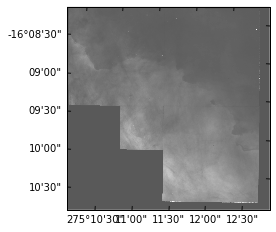

In [98]:
fig = plt.figure(figsize=(8,8))

ax1 = fig.add_subplot(1,2,1, projection=WCS(nmos656.header))
ax1.imshow(array, vmax=1000, cmap='gray')


https://www.spacetelescope.org/images/opo9544a/ https://www.spacetelescope.org/projects/fits_liberator/eagledata/
http://hubblesite.org/gallery/behind_the_pictures/meaning_of_color/eagle.php